In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('dataset1.csv')
df

,Review,Rating
0,Some major design flaws,3
1,My favorite buy!,5
2,Flattering shirt,5
3,Not for the very petite,2
4,Cagrcoal shimmer fun,5
...,...,...
45365,Dress felt and fit great. I got lots of compl...,5
45366,Loved the dress but poor quality,2
45367,"Cute dress, didn't fit",1
45368,Very cute!,4


In [3]:
df.isnull().any()

Review    False
Rating    False
dtype: bool

In [4]:
has_duplicates = df.duplicated().any()
print(has_duplicates)

True


In [5]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 12404


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [8]:
#Remove conflicting reviews (same text but different ratings)
conflicting_counts = df.groupby('Review')['Rating'].nunique()
print(conflicting_counts)

Review
!!!                                                                                1
!.She loves the pj. Thank you Elizabeth.                                           1
"Dress" T-shirt for slim guy                                                       1
"I'm Thinking" Hanes Men's Short Sleeve Graphic T-shirt Size M                     1
"No Liner-Liner" means no liner...                                                 1
                                                                                  ..
🤔  Perfect performance 🏋🏾‍♂️                                                       1
🤨                                                                                  1
🤬                                                                                  1
🥱                                                                                  1
🥶. IT LOOKS HEAVY, BUT, IT’S NOT, ITS FIRE 🔥 , AS THE YOUNG KIDS SAY ITS FIRE 🔥    1
Name: Rating, Length: 31094, dtype: int64


In [9]:
# Filter to only reviews that have more than one unique rating
conflicting_reviews = conflicting_counts[conflicting_counts > 1]
print("Number of conflicting review texts:", conflicting_reviews.shape[0])

Number of conflicting review texts: 1484


In [10]:
conflicting_reviews = df.groupby('Review')['Rating'].nunique()
conflicting_reviews = conflicting_reviews[conflicting_reviews > 1].index
df = df[df['Review'].isin(conflicting_reviews) == False]


In [11]:
conflicting_counts = df.groupby('Review')['Rating'].nunique()
conflicting_reviews = conflicting_counts[conflicting_counts > 1]
print("Number of conflicting review texts:", conflicting_reviews.shape[0])

Number of conflicting review texts: 0


In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df

,Review,Rating
0,Some major design flaws,3
1,My favorite buy!,5
2,Flattering shirt,5
3,Not for the very petite,2
4,Cagrcoal shimmer fun,5
...,...,...
29605,Perfect wedding dress! Just get it!,5
29606,Elegant 💞💞💞,5
29607,Dress felt and fit great. I got lots of compl...,5
29608,Loved the dress but poor quality,2


In [15]:
df['Rating'].value_counts()

Rating
5    15998
4     5097
3     3593
1     2673
2     2249
Name: count, dtype: int64

Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23512\1617310085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


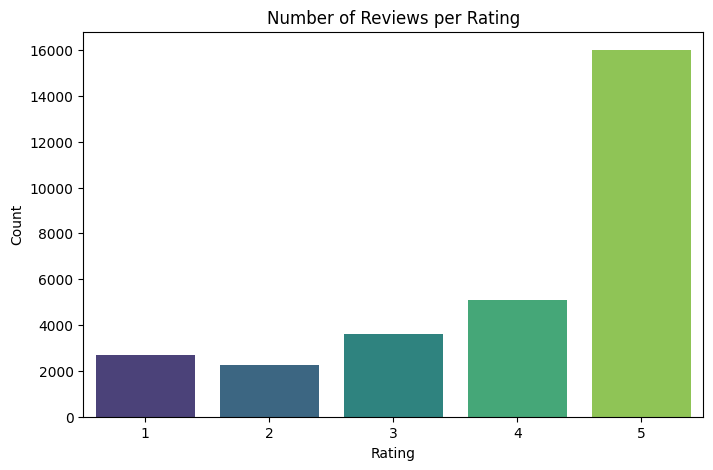

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


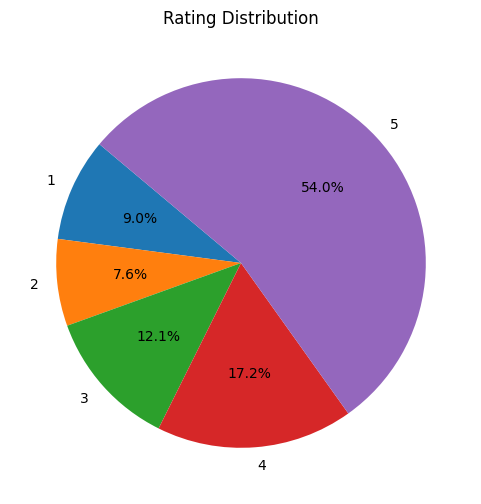

In [20]:
rating_counts = df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()


In [30]:

df['Review_clean'] = df['Review'].str.lower()



In [31]:
#remove punctuations
df['Review_clean']=df['Review_clean'].str.replace(r'[^\w\s]', '', regex=True)
df['Review_clean']=df['Review_clean'].str.replace(r'\[.*?\]', '', regex=True)

In [32]:
df

,Review,Rating,Review_clean
0,Some major design flaws,3,some major design flaws
1,My favorite buy!,5,my favorite buy
2,Flattering shirt,5,flattering shirt
3,Not for the very petite,2,not for the very petite
4,Cagrcoal shimmer fun,5,cagrcoal shimmer fun
...,...,...,...
29605,Perfect wedding dress! Just get it!,5,perfect wedding dress just get it
29606,Elegant 💞💞💞,5,elegant
29607,Dress felt and fit great. I got lots of compl...,5,dress felt and fit great i got lots of compli...
29608,Loved the dress but poor quality,2,loved the dress but poor quality


LEMMATIZATION , REMOVE STOP WORD

In [33]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [35]:
def cleaning(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

In [36]:
df['Review_clean'] = df['Review_clean'].apply(cleaning)

In [38]:
df

,Review,Rating,Review_clean
0,Some major design flaws,3,major design flaw
1,My favorite buy!,5,favorite buy
2,Flattering shirt,5,flattering shirt
3,Not for the very petite,2,petite
4,Cagrcoal shimmer fun,5,cagrcoal shimmer fun
...,...,...,...
29605,Perfect wedding dress! Just get it!,5,perfect wedding dress
29606,Elegant 💞💞💞,5,elegant
29607,Dress felt and fit great. I got lots of compl...,5,dress feel fit great get lot compliment
29608,Loved the dress but poor quality,2,love dress poor quality


In [49]:
# Find rows where Review is an empty string
empty_reviews = df[df['Review_clean'].str.strip() == '']
print("Number of empty (non-null) reviews:", empty_reviews.shape[0])


Number of empty (non-null) reviews: 186


In [52]:
# Remove rows where Review is empty after cleaning
df = df[df['Review_clean'].str.strip() != '']


In [53]:
# Find rows where Review is an empty string
empty_reviews = df[df['Review_clean'].str.strip() == '']
print("Number of empty (non-null) reviews:", empty_reviews.shape[0])


Number of empty (non-null) reviews: 0


In [54]:
df

,Review,Rating,Review_clean
0,Some major design flaws,3,major design flaw
1,My favorite buy!,5,favorite buy
2,Flattering shirt,5,flattering shirt
3,Not for the very petite,2,petite
4,Cagrcoal shimmer fun,5,cagrcoal shimmer fun
...,...,...,...
29605,Perfect wedding dress! Just get it!,5,perfect wedding dress
29606,Elegant 💞💞💞,5,elegant
29607,Dress felt and fit great. I got lots of compl...,5,dress feel fit great get lot compliment
29608,Loved the dress but poor quality,2,love dress poor quality


SENTIMENT

In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [60]:



analyzer = SentimentIntensityAnalyzer()

# define a function to get the score
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# apply the function
df['sentiment'] = df['Review_clean'].apply(get_sentiment)
df

,Review,Rating,Review_clean,sentiment
0,Some major design flaws,3,major design flaw,0.0000
1,My favorite buy!,5,favorite buy,0.4588
2,Flattering shirt,5,flattering shirt,0.3182
3,Not for the very petite,2,petite,0.0000
4,Cagrcoal shimmer fun,5,cagrcoal shimmer fun,0.5106
...,...,...,...,...
29605,Perfect wedding dress! Just get it!,5,perfect wedding dress,0.5719
29606,Elegant 💞💞💞,5,elegant,0.4767
29607,Dress felt and fit great. I got lots of compl...,5,dress feel fit great get lot compliment,0.8658
29608,Loved the dress but poor quality,2,love dress poor quality,0.2732


In [61]:
pd.to_pickle(df, 'cleaned_imbalanced.pkl')

In [62]:
df.to_csv("cleaned_imbalanced.csv", encoding="utf-8-sig")

BALANCING DATASET

In [63]:
balanced_data = df.copy()
balanced_data

,Review,Rating,Review_clean,sentiment
0,Some major design flaws,3,major design flaw,0.0000
1,My favorite buy!,5,favorite buy,0.4588
2,Flattering shirt,5,flattering shirt,0.3182
3,Not for the very petite,2,petite,0.0000
4,Cagrcoal shimmer fun,5,cagrcoal shimmer fun,0.5106
...,...,...,...,...
29605,Perfect wedding dress! Just get it!,5,perfect wedding dress,0.5719
29606,Elegant 💞💞💞,5,elegant,0.4767
29607,Dress felt and fit great. I got lots of compl...,5,dress feel fit great get lot compliment,0.8658
29608,Loved the dress but poor quality,2,love dress poor quality,0.2732


In [65]:
balanced_data['Rating'].value_counts()

Rating
5    15908
4     5084
3     3565
1     2639
2     2228
Name: count, dtype: int64

In [66]:


# Assuming df is your DataFrame and 'Cons_rating' is the column to balance
target_count = 2000
balanced_df = pd.DataFrame()

# Loop over each unique rating
for rating in df['Rating'].unique():
    subset = df[df['Rating'] == rating]
    
    if len(subset) > target_count:
        # Downsample
        subset = subset.sample(n=target_count, random_state=42)
    elif len(subset) < target_count:
        # Upsample with replacement
        subset = subset.sample(n=target_count, replace=True, random_state=42)
    
    # Append to final DataFrame
    balanced_df = pd.concat([balanced_df, subset])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check result
print(balanced_df['Rating'].value_counts())


Rating
4    2000
2    2000
3    2000
5    2000
1    2000
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23512\3393103518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=balanced_df, palette='viridis')


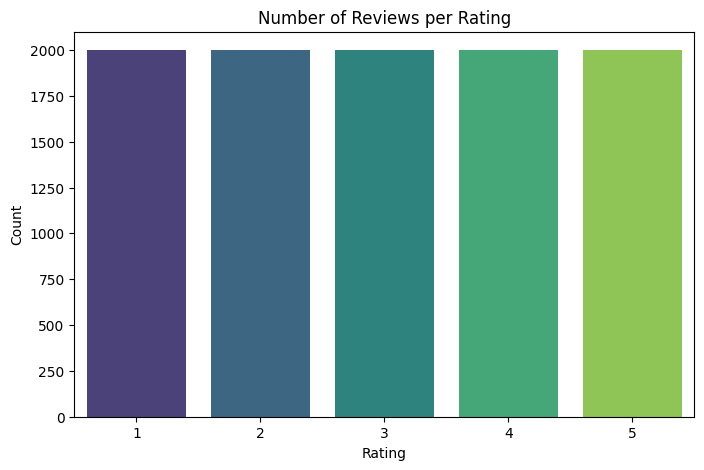

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=balanced_df, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


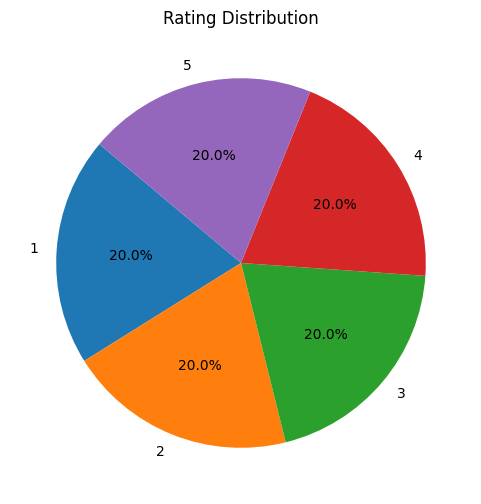

In [76]:
rating_counts = balanced_df['Rating'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Rating Distribution")
plt.show()


In [67]:
pd.to_pickle(balanced_df, 'cleaned_balanced.pkl')

In [68]:
balanced_df.to_csv("cleaned_balanced.csv", encoding="utf-8-sig")

TF-IDF

In [70]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [72]:
# create a tfidf vectorizer matrix
tv = TfidfVectorizer()
Xt = tv.fit_transform(balanced_df['Review_clean'])

In [73]:
X = pd.DataFrame(Xt.toarray(), columns=tv.get_feature_names_out())
X

,00,045blue,0star,10,100,105lb5,10oct,10year,10yo,11,...,yuck,yucky,yum,yummysweater,zander,zero,zip,zipno,zipper,zipup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
y=balanced_df['Rating']
y

0       4
1       2
2       3
3       2
4       2
       ..
9995    2
9996    2
9997    2
9998    3
9999    4
Name: Rating, Length: 10000, dtype: int64